In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

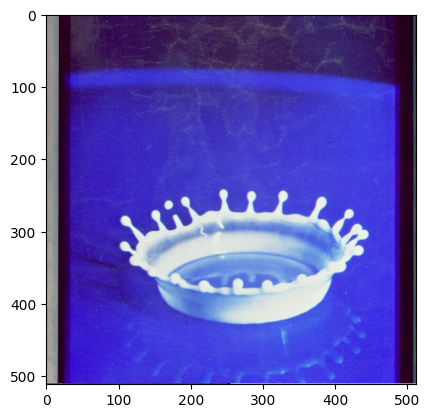

In [2]:
image = cv2.imread('imgs/4.2.01.tiff')
plt.imshow(image)
plt.show()

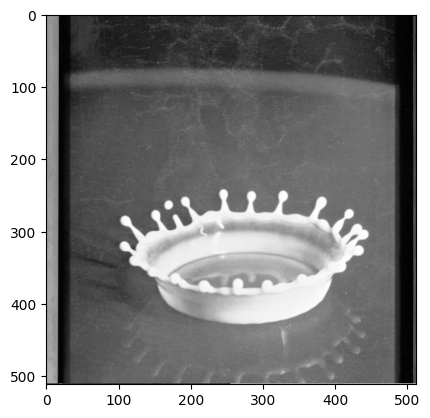

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

#or
"""
gray = np.zeros((image.shape[0],image.shape[1]))
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        gray[i][j] = image[i][j].sum() // 3

gray = np.array(gray)
"""

plt.imshow(gray, cmap='gray')
plt.show()

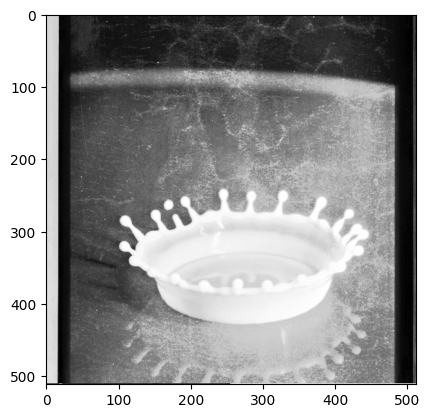

In [5]:
# generate a histogram of the grayscale image
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
#or
"""
hist = np.zeros(256)
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        hist[gray[i,j]] += 1

hist = np.array(hist)
"""
#normalize the histogram
norm_hist = hist / (gray.shape[0] * gray.shape[1])
# or
"""
norm_hist = np.zeros(256)
for i in range(0,255):
    norm_hist[i] = hist[i] / (gray.shape[0] * gray.shape[1])

norm_hist = np.array(norm_hist)
"""

# compute the cumulative distribution function
cumulative_distribution_function = norm_hist.cumsum()
# or
"""
cumulative_distribution_function = np.zeros(255)
for i in range(0,255)
    if i == 0:
        cumulative_distribution_function[i] = norm_hist[i]
    else:
        cumulative_distribution_function[i] = cumulative_distribution_function[i-1] + norm_hist[i]

cumulative_distribution_function = np.array(cumulative_distribution_function)
"""

# equalize the histogram and the grayscale image
#eq = cv2.equalizeHist(gray)
#eq_hist = cv2.calcHist([eq], [0], None, [256], [0, 256])

# or

eq = np.zeros((image.shape[0],image.shape[1]),dtype = np.uint8)
eq_hist = np.zeros(256)

for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        eq[i,j] = 255 * cumulative_distribution_function[gray[i,j]]
        eq_hist[eq[i,j]] += 1

eq = np.array(eq)
eq_hist = np.array(eq_hist)


eq_cumulative_distribution_function = eq_hist.cumsum()


plt.imshow(eq, cmap='gray')
plt.show()

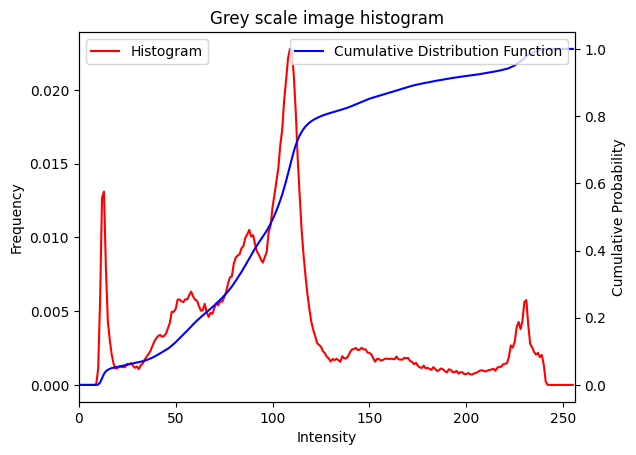

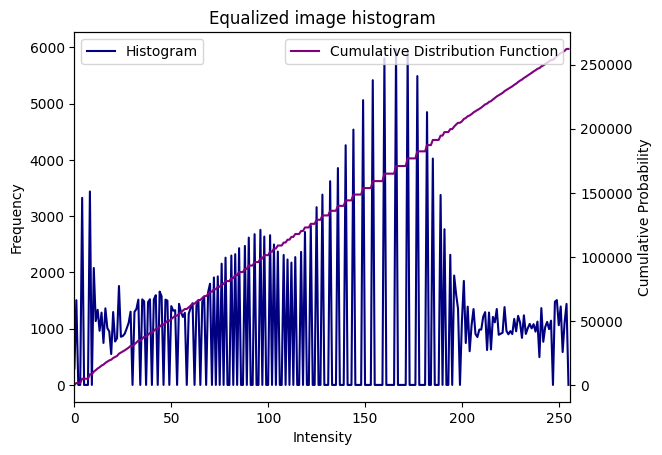

In [6]:
# plot the histogram and cumulative distribution function
fig, ax = plt.subplots()
ax.plot(norm_hist, color="red", label="Histogram")
ax2 = ax.twinx()
ax2.plot(cumulative_distribution_function, color="blue", label="Cumulative Distribution Function")
ax.set_xlim([0, 256])
ax.set_xlabel("Intensity")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Probability")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title('Grey scale image histogram')
plt.show()

# plot the histogram and cumulative distribution function of the equalized imgs

fig, ax = plt.subplots()
ax.plot(eq_hist, color="navy", label="Histogram")
ax2 = ax.twinx()
ax2.plot(eq_cumulative_distribution_function, color="purple", label="Cumulative Distribution Function")
ax.set_xlim([0, 256])
ax.set_xlabel("Intensity")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Probability")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title('Equalized image histogram')
plt.show()